In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# import warnings
# from statsbombpy.api_client import NoAuthWarning
# warnings.simplefilter('ignore', NoAuthWarning)
# from socceraction.data.statsbomb import StatsBombLoader
# import socceraction.spadl as spadl

# api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

# g = 18240
# team_id = 169 # 180/169
# df_teams = api.teams(game_id=g)
# df_players = api.players(game_id=g)
# df_events = api.events(game_id=g)

# df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=team_id)
# df_actions = (
# spadl
# .add_names(df_actions)
# .merge(api.teams(game_id=g))
# .merge(api.players(game_id=g))
# )
# df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

Barcelona vs Manchester United (Champions League Final - 2008/2009)
    nice_time    player_name                     type_name    result_name    team_name
--  -----------  ------------------------------  -----------  -------------  -----------
 0  8m58s        Andrés Iniesta Luján            dribble      success        Barcelona
 1  8m59s        Andrés Iniesta Luján            pass         success        Barcelona
 2  8m59s        Lionel Andrés Messi Cuccittini  dribble      success        Barcelona
 3  9m0s         Lionel Andrés Messi Cuccittini  pass         success        Barcelona
 4  9m1s         Andrés Iniesta Luján            dribble      success        Barcelona
 5  9m4s         Andrés Iniesta Luján            pass         success        Barcelona
 6  9m6s         Samuel Eto''o Fils              dribble      success        Barcelona
 7  9m7s         Samuel Eto''o Fils              take_on      success        Barcelona
 8  9m7s         Samuel Eto''o Fils              dribble    

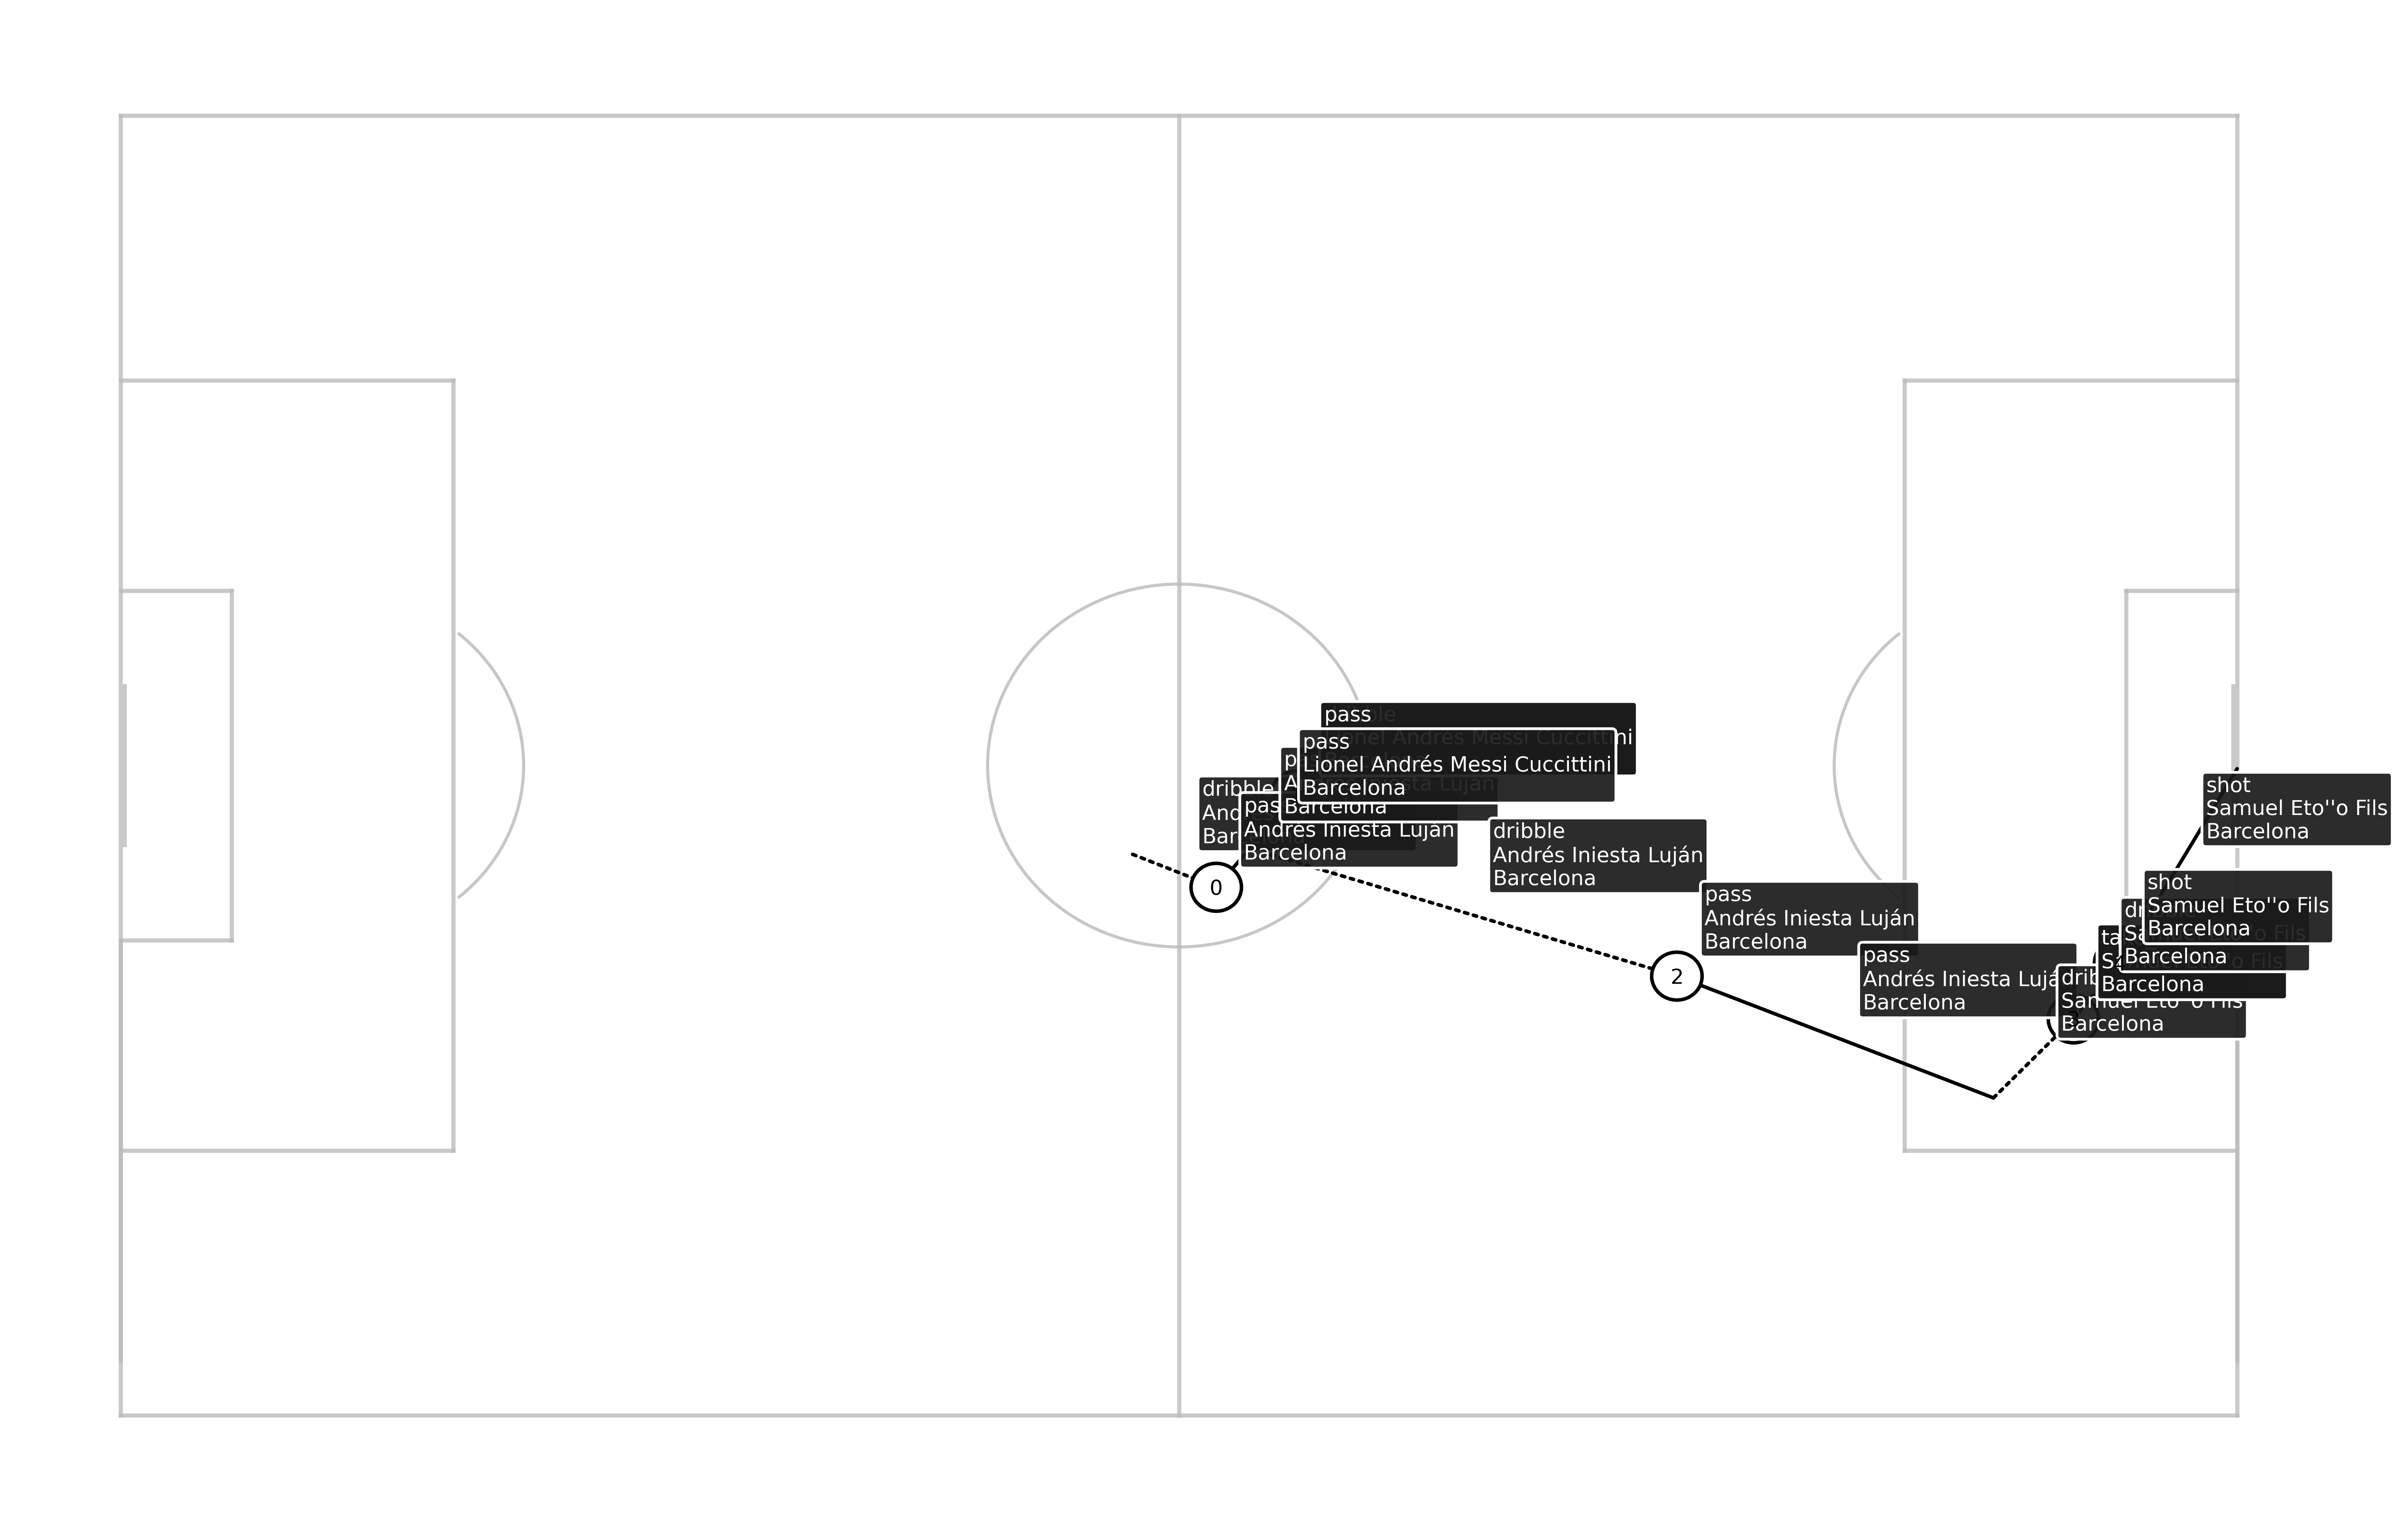

    nice_time    player_name                     type_name    result_name    team_name
--  -----------  ------------------------------  -----------  -------------  -----------------
 0  69m38s       Carles Puyol i Saforcada        dribble      success        Barcelona
 1  69m42s       Carles Puyol i Saforcada        pass         success        Barcelona
 2  69m43s       Samuel Eto''o Fils              dribble      success        Barcelona
 3  69m45s       Samuel Eto''o Fils              cross        fail           Barcelona
 4  69m45s       Ryan Giggs                      clearance    success        Manchester United
 5  69m47s       Patrice Evra                    clearance    success        Manchester United
 6  69m49s       Xavier Hernández Creus          dribble      success        Barcelona
 7  69m51s       Xavier Hernández Creus          pass         success        Barcelona
 8  69m52s       Lionel Andrés Messi Cuccittini  dribble      success        Barcelona
 9  69m53s       Li

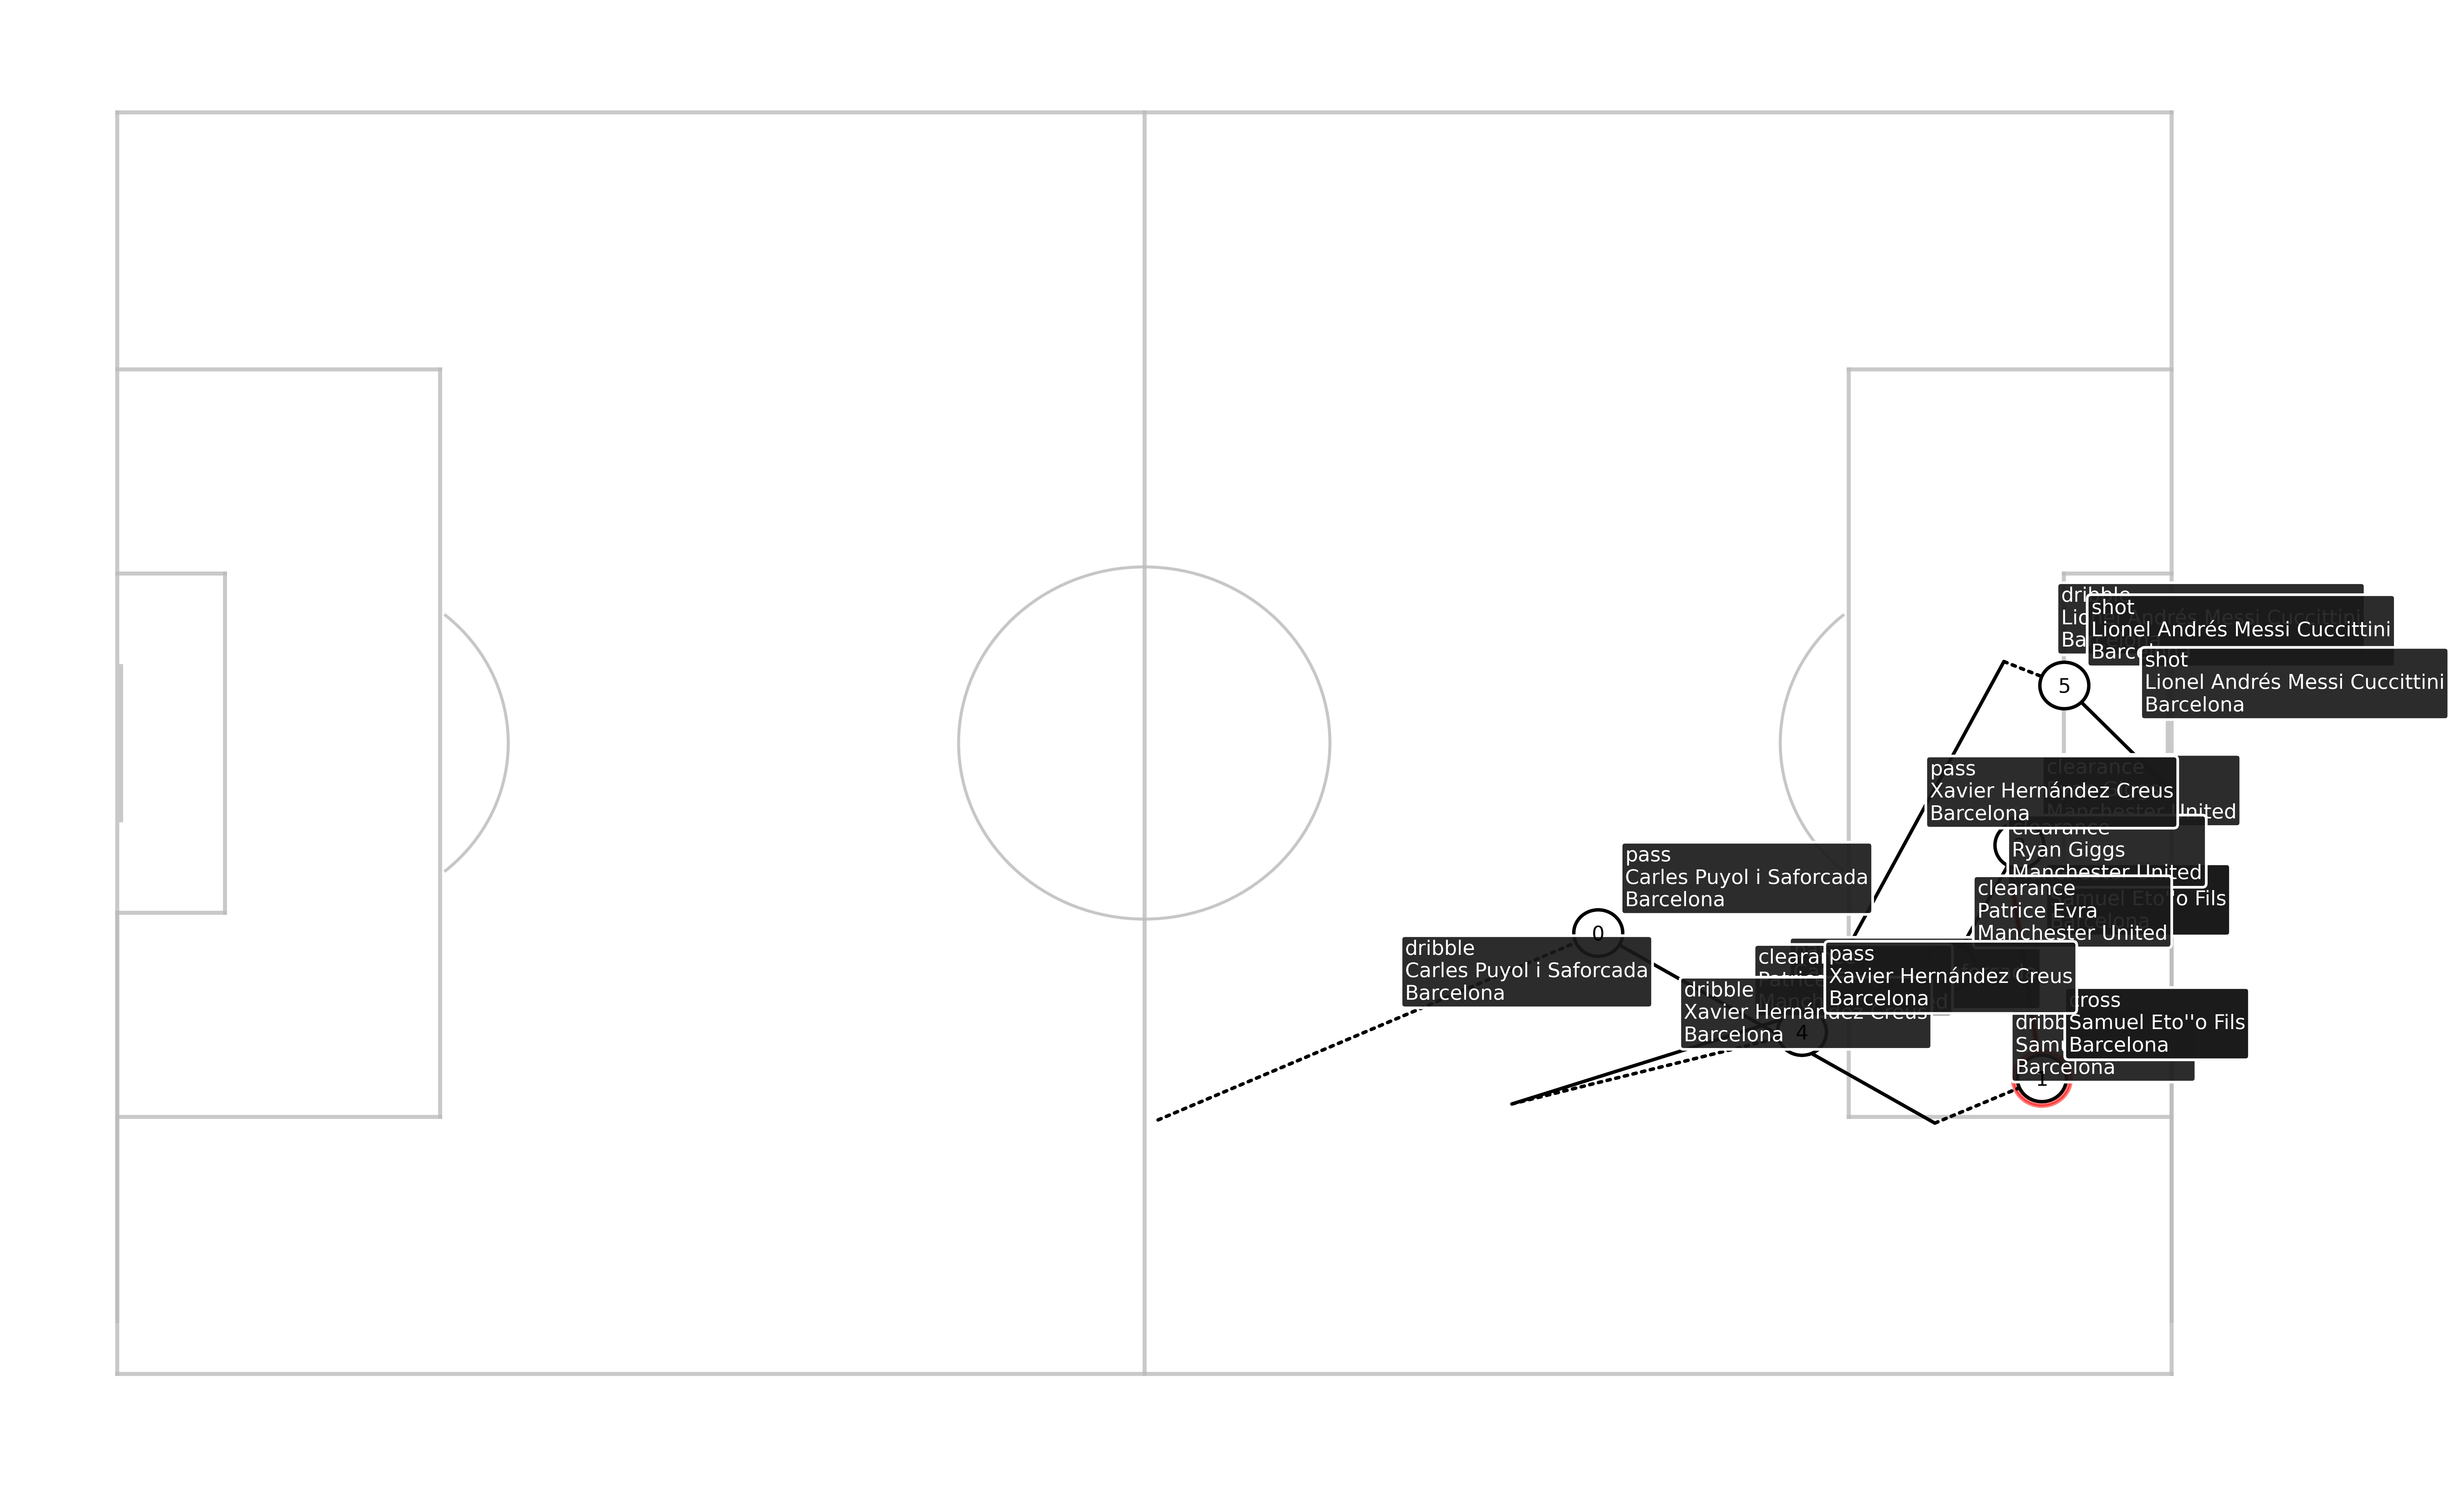

In [3]:
import random
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl
import statsbombplot as sbp

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

loop = True

while loop:

    loop = False

    df_competitions = api.competitions()
    random_row = df_competitions.sample(1)

    competition_id = random_row['competition_id'].item()
    season_id = random_row['season_id'].item()
    competition_name = random_row['competition_name'].item()
    season_name = random_row['season_name'].item()

    df_games = api.games(competition_id=competition_id, season_id=season_id)
    all_games = list(df_games.game_id)
    g = random.choice(all_games)
    
    c_stage = df_games[df_games['game_id'] == g]['competition_stage'].item()
    df_teams = api.teams(game_id=g)
    df_players = api.players(game_id=g)
    df_events = api.events(game_id=g)
    teams = list(df_events['team_name'].unique())
    teams_id = list(df_events['team_id'].unique())

    df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=teams_id[0])
    df_actions = (
    spadl
    .add_names(df_actions)
    .merge(api.teams(game_id=g))
    .merge(api.players(game_id=g))
    )
    df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

    c_string = f"{teams[0]} vs {teams[1]} ({competition_name} {c_stage} - {season_name})"

    print(c_string)

    sbp.draw_goals(df_actions)